In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
# import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../creditcard.csv')

In [3]:
legit=df[df.Class==0]
fraud = df[df.Class == 1]

In [4]:
class_0_data = df[df['Class'] == 0].sample(n=492, random_state=42)
class_1_data = df[df['Class'] == 1].sample(n=492, random_state=42)

In [5]:
selected_data = pd.concat([class_0_data, class_1_data])
selected_data.to_csv('downsampled_data.csv', index=False)

In [6]:
df1 = pd.read_csv('./downsampled_data.csv')

In [7]:
x=df1.drop('Class',axis=1)
y=df1['Class']
print(len(x))
print(len(y))

984
984


In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
print(x_train.shape,y_train.shape)

(738, 30) (738,)


In [11]:
print(x_test.shape,y_test.shape)

(246, 30) (246,)


In [12]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [13]:
model = models.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(x_train.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
epc=40
bs=64

In [16]:
modelfit=model.fit(x_train, y_train, epochs=epc, batch_size=bs, validation_data=(x_test, y_test))

Epoch 1/40
12/12 [==============================] - 1s 25ms/step - loss: 0.6711 - accuracy: 0.5772 - val_loss: 0.6451 - val_accuracy: 0.7683
Epoch 2/40
12/12 [==============================] - 0s 6ms/step - loss: 0.6030 - accuracy: 0.8753 - val_loss: 0.5563 - val_accuracy: 0.7846
Epoch 3/40
12/12 [==============================] - 0s 6ms/step - loss: 0.4971 - accuracy: 0.8889 - val_loss: 0.4329 - val_accuracy: 0.8902
Epoch 4/40
12/12 [==============================] - 0s 6ms/step - loss: 0.3721 - accuracy: 0.9119 - val_loss: 0.3374 - val_accuracy: 0.8699
Epoch 5/40
12/12 [==============================] - 0s 6ms/step - loss: 0.2931 - accuracy: 0.9092 - val_loss: 0.2655 - val_accuracy: 0.9309
Epoch 6/40
12/12 [==============================] - 0s 6ms/step - loss: 0.2599 - accuracy: 0.9146 - val_loss: 0.2368 - val_accuracy: 0.9024
Epoch 7/40
12/12 [==============================] - 0s 6ms/step - loss: 0.2268 - accuracy: 0.9268 - val_loss: 0.2182 - val_accuracy: 0.9268
Epoch 8/40
12/12 [=

In [17]:
model.save("CNN_Downsampling_model.keras")

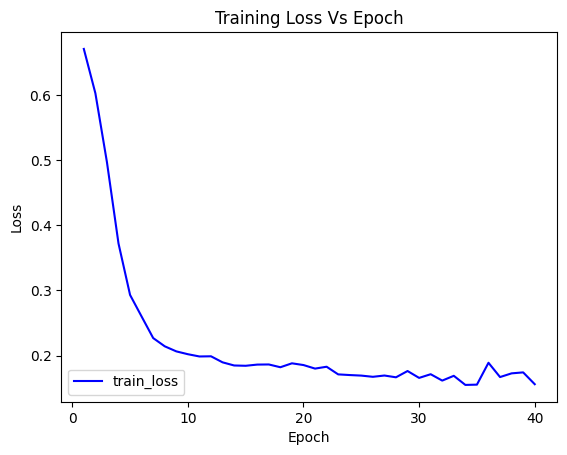

In [18]:
myarr=np.arange(0, epc, 10)
myarr=np.append(myarr,epc)

plt.plot(np.arange(1,epc+1), modelfit.history["loss"], label="train_loss", color='blue')
plt.title("Training Loss Vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(myarr)
plt.legend(loc="lower left")
plt.rcParams['figure.figsize']=(16,6)
plt.show()

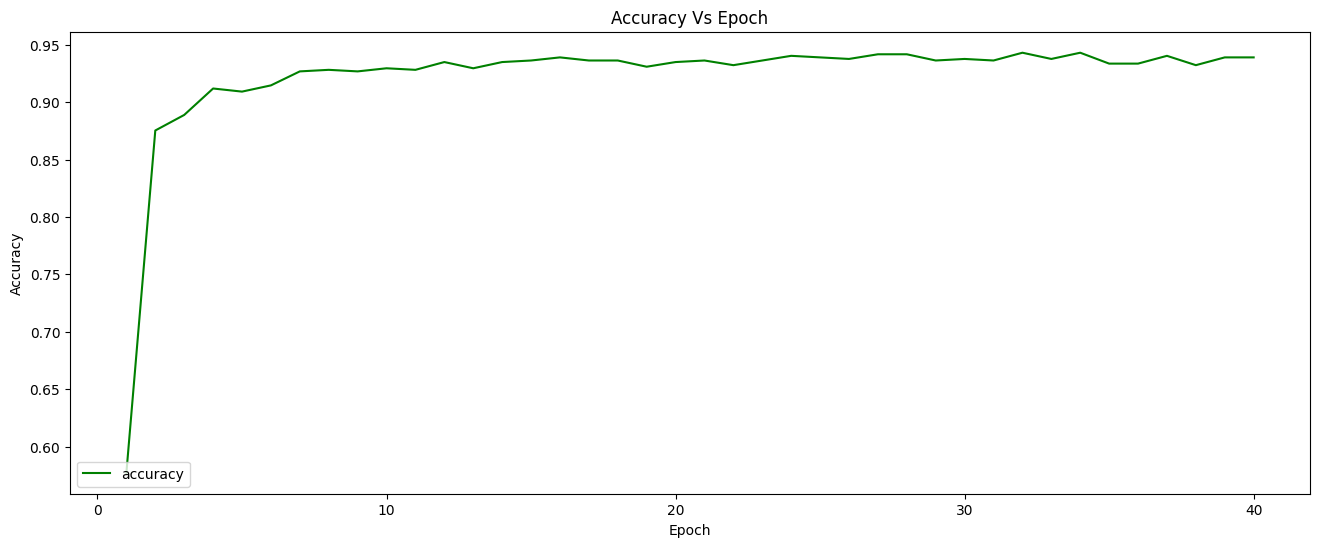

In [19]:
plt.plot(np.arange(1, epc+1), modelfit.history["accuracy"], label="accuracy", color='green')
plt.title("Accuracy Vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(myarr)
plt.legend(loc="lower left")
plt.rcParams['figure.figsize']=(16,6)
plt.show()

In [20]:
y_train_pred=model.predict(x_train)

24/24 [==============================] - 0s 1ms/step


In [21]:
y_train_pred=(y_train_pred>0.5).astype(int)

In [22]:
print("Accuracy on Training Data : ",accuracy_score(y_train,y_train_pred))

Accuracy on Training Data :  0.94579945799458


In [23]:
print("Classification Report :\n",classification_report(y_train_pred,y_train))

Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       398
           1       0.90      0.99      0.94       340

    accuracy                           0.95       738
   macro avg       0.95      0.95      0.95       738
weighted avg       0.95      0.95      0.95       738



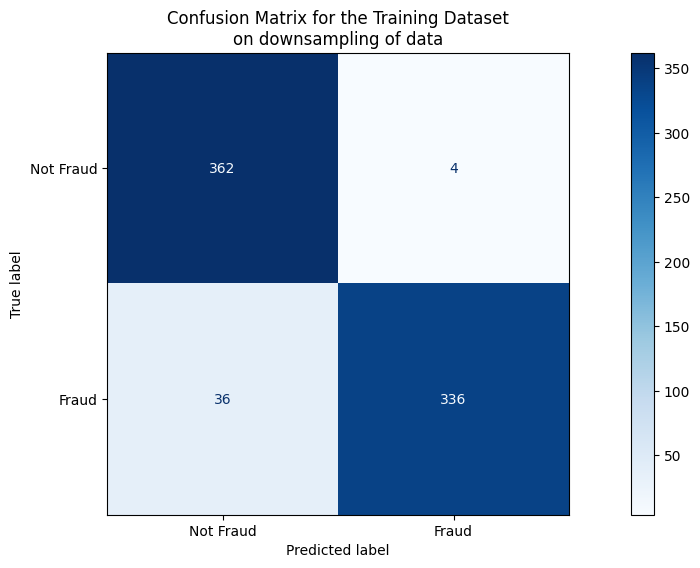

In [24]:
cm = confusion_matrix(y_train, y_train_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for the Training Dataset\non downsampling of data')
plt.show();